In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["OPENCV_IO_ENABLE_OPENEXR"]="1"
import cv2

from os.path import join
import imageio.v2 as imageio

In [47]:
imgpath = '/home/alban/Dropbox/mlab/users/alban/works/InvRend/projects/pipeline_intrinsic_3datasets/test_outs/results_TwoCubesBlender128_AlbanNetsup128bis_1/img_0.1_0.0_0.0.exr'

In [48]:
img = cv2.imread(imgpath, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
albedo = cv2.imread(imgpath.replace('.exr','_ref.exr'), cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
albedo = cv2.cvtColor(albedo, cv2.COLOR_BGR2RGB)
prediction = cv2.imread(imgpath.replace('.exr','_albedo0.exr'), cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
prediction = cv2.cvtColor(prediction, cv2.COLOR_BGR2RGB)

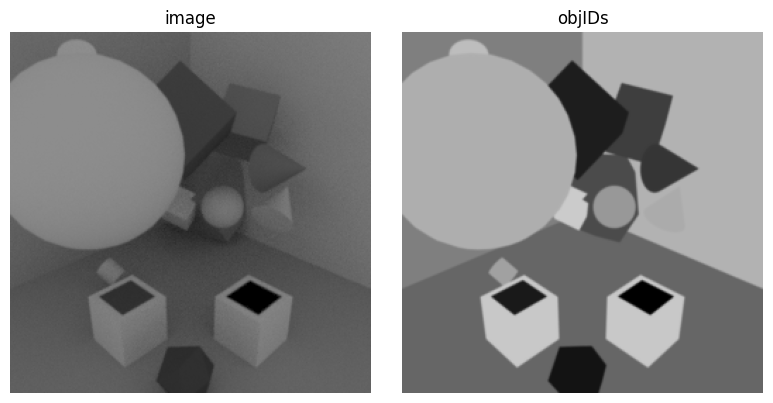

In [49]:
fig, subs = plt.subplots(1,2, sharex=True, sharey=True, figsize=(8,4))

subs[0].imshow((img)**(1/2.2))
#subs[0].imshow(img)
subs[0].axis('off')
subs[0].set_title('image')
subs[1].imshow(albedo)
subs[1].axis('off')
subs[1].set_title('objIDs')
fig.tight_layout()
plt.show()

In [55]:
### PERFORMING K-MEAN
albedoflat = albedo.reshape(-1, 3)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.02)

k = 21
_, labelsflat, (centers) = cv2.kmeans(albedoflat, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

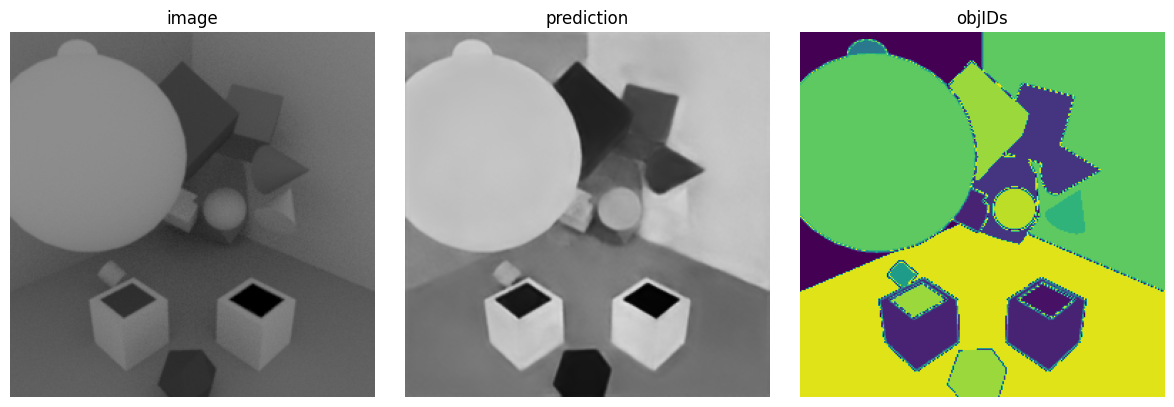

In [59]:
labels = labelsflat.reshape((256,256,1) )

fig, subs = plt.subplots(1,3, sharex=True, sharey=True, figsize=(12, 4))

subs[0].imshow((img)**(1/2.2))
#subs[0].imshow(img)
subs[0].axis('off')
subs[0].set_title('image')
subs[1].imshow(prediction)
subs[1].axis('off')
subs[1].set_title('prediction')
subs[2].imshow(labels)
subs[2].axis('off')
subs[2].set_title('objIDs')
fig.tight_layout()
plt.show()

In [54]:
def consistency_metric(image, labels):
    nb_segments = labels.max()
    err = 0
    for seg in range(nb_segments):
        mask = labels==seg
        sizeseg = np.sum(mask*1)/(labels.size)
        if image.shape[-1]==3:
            mask = np.concatenate((mask, mask, mask),2)
        #import pdb; pdb.set_trace()
        err+=np.var(image[mask])*sizeseg
    return err

print(consistency_metric(albedo, labels))
print(consistency_metric(prediction, labels))


7.875774378968484e-05
0.0012043048015319968
